# A look at the active region data for solar cycle 24

In this notebook we look at the active region data from NOAA SWPC over the past solar cycle. The data loaded in here is in this repository (`all_ar_2010-2020.csv`) and is created from the `ar_data.py` file by using sunpy to query the HEK. There is also active region data spanning back to 1996 in the csv file `concat_1996-2020.csv` which would also work with the analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import dates
from matplotlib.colors import LogNorm
from sunpy.time import parse_time
from sunpy.coordinates import frames
import sunpy.map
from astropy.coordinates import SkyCoord
from astropy import units as u
import datetime
import pylab

### Lets first read the data from the csv file into a pandas DataFrame

We can see here all the columns available in this DataFrame, and each input.

In [2]:
all_data = pd.read_csv('all_ar_2010-2020.csv')
all_data.keys()

Index(['ar_noaanum', 'event_starttime', 'event_endtime', 'hpc_x', 'hpc_y',
       'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'frm_humanflag', 'frm_name',
       'frm_daterun', 'ar_mtwilsoncls', 'ar_mcintoshcls', 'SOL_standard',
       'ar_numspots', 'area_atdiskcenter', 'area_unit'],
      dtype='object')

In [3]:
# print out first 5 rows
all_data.head()

,ar_noaanum,event_starttime,event_endtime,hpc_x,hpc_y,hgs_x,hgs_y,hgc_x,hgc_y,frm_humanflag,frm_name,frm_daterun,ar_mtwilsoncls,ar_mcintoshcls,SOL_standard,ar_numspots,area_atdiskcenter,area_unit
0,11039,2010-01-01T00:00:00,2010-01-01T23:59:59,310.0524,-417.0456,21,-28,53.886793,-28,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DAI,SOL2010-01-01T00:00:00L053C118,8,395677824.0,km2
1,11039,2010-01-02T00:00:00,2010-01-02T23:59:59,500.5560,-405.0690,35,-27,54.716359,-27,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-02T00:00:00L054C117,6,365241056.0,km2
2,11039,2010-01-03T00:00:00,2010-01-03T23:59:59,621.7500,-424.9320,46,-28,52.546168,-28,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-03T00:00:00L052C118,12,578298370.0,km2
3,11039,2010-01-04T00:00:00,2010-01-04T23:59:59,733.3260,-447.6492,59,-29,52.376210,-29,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-04T00:00:00L052C119,10,669608640.0,km2
4,11039,2010-01-05T00:00:00,2010-01-05T23:59:59,820.6980,-441.8724,72,-28,52.206490,-28,True,NOAA SWPC Observer,2012-04-12T23:32:04,BETA,DSO,SOL2010-01-05T00:00:00L052C118,5,456551328.0,km2


We want to get the times into a datetime object, and also get he times in seconds for active region. This is so that we can plot per time

In [4]:
tt = pd.to_datetime(all_data["event_starttime"])
# create a column with the datetime objects
all_data["time_datetime"] = tt

# lets find time in seconds for each row from 2010-01-01
times = [(t - tt[0]).total_seconds() for t in tt]
#create a new column of `times` that includes seconds from the start observation of the file
all_data["time_since_sec"] = times 

In [5]:
# we can also get a column of times since 2010-01-01 in days rather than seconds
all_data["time_since_day"] = np.array(all_data["time_since_sec"])*u.second.to(u.day)

### We can inspect the data

The columns "`hpc_x`, `hpc_y`, are helioprojective x and y coords. Similarly `hgs_x/y` and `hgc_x/y` are heliographic stonyhurst and heliographic carrington respectively.

Lets plots these coordinates.

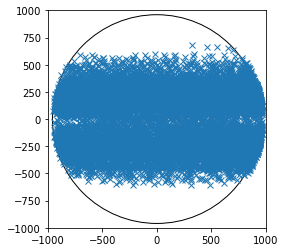

In [6]:
fig, ax = plt.subplots()
ax.plot(all_data["hpc_x"], all_data["hpc_y"], marker="x", ls="")
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1000, 1000)
# overplot a circle of ~radius of sun in arcsec
circle1 = plt.Circle((0, 0), 960, color='k', fill=False)
ax.add_artist(circle1)

We can use matplotlibs `scatter` to add colors of time to each point using the `times` defined above. We can also scale the size of the data points by the active region area. This is done by using the `c` keyword for colors and `s` keyword for size in the `scatter` function

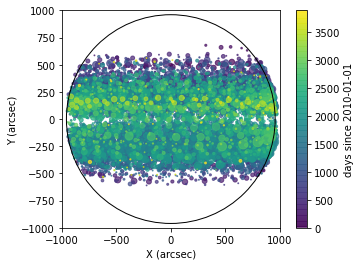

In [7]:
fig, ax = plt.subplots()
im = ax.scatter(all_data['hpc_x'], all_data['hpc_y'], 
                s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(),
                c=all_data["time_since_day"], 
                alpha=0.7)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1000, 1000)
ax.set_ylabel("Y (arcsec)")
ax.set_xlabel("X (arcsec)")
# overplot a circle of ~radius of sun in arcsec
circle1 = plt.Circle((0, 0), 960, color='k', fill=False)
ax.add_artist(circle1)
fig.colorbar(im, label="days since 2010-01-01")

We can also plot this is the different projections

Text(0, 0.5, 'Heliographic Latitude')

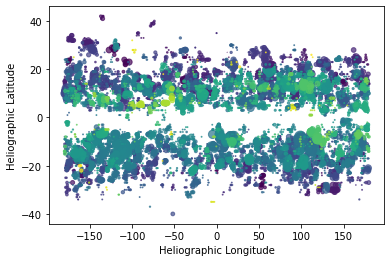

In [8]:
plt.scatter(all_data['hgc_x'], all_data['hgc_y'], 
            s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
            c=all_data["time_since_day"], 
            alpha=0.7)
plt.xlabel("Heliographic Longitude")
plt.ylabel("Heliographic Latitude")

Text(0, 0.5, 'Latitude')

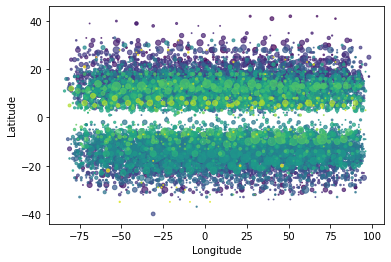

In [9]:
plt.scatter(all_data['hgs_x'], all_data['hgs_y'], 
            s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
            c=all_data["time_since_day"], 
            alpha=0.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

## Butterfly diagram
We can also look at the butterfly diagram over the past solar cycle by plotting heliographic latitude as a function of time.

Text(0, 0.5, 'Latitude')

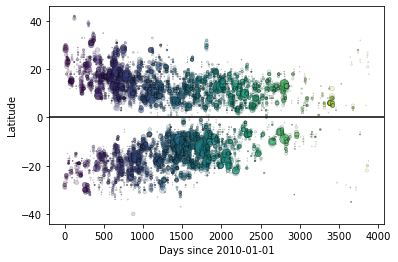

In [10]:
fig, ax = plt.subplots()
ax.scatter(all_data["time_since_day"], 
           all_data['hgc_y'], 
           alpha=0.2, 
           c=all_data["time_since_day"], 
           s=10*all_data['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(),
           cmap='viridis', 
           edgecolor='k', 
           lw=0.5)
ax.axhline(0, color='k')
ax.set_xlabel("Days since 2010-01-01")
ax.set_ylabel("Latitude")

## Plot on disk as a function of time

Lets now look at plotting on disk as a function of time.

We first need to make a list of all unique days from start to end. This is needed, as there are some days where no active regions are present in the file. 

In [11]:
# Pull out start and end times
tstart = parse_time(all_data['event_starttime'].min()).datetime
tfinal = parse_time(all_data['event_endtime'].max()).datetime
# create list and loop over to make unique list of days
time_over = [tstart.strftime('%Y-%m-%dT%H:%M:%S')]
t0 = tstart
while t0 < tfinal:
    t0 = t0 + datetime.timedelta(days=1)
    time_over.append(t0.strftime('%Y-%m-%dT%H:%M:%S'))

In [12]:
time_over[0:10]

['2010-01-01T00:00:00',
 '2010-01-02T00:00:00',
 '2010-01-03T00:00:00',
 '2010-01-04T00:00:00',
 '2010-01-05T00:00:00',
 '2010-01-06T00:00:00',
 '2010-01-07T00:00:00',
 '2010-01-08T00:00:00',
 '2010-01-09T00:00:00',
 '2010-01-10T00:00:00']

In [13]:
def plot_for_date(i, save=False, savedir='./plots/'):
    """
    Function to plot a certain date and the active regions for that day and the past 10 days. 
    
    The `i` input is the index of `time_over` to plot. For example is i=0 is given it will plot
    the data for 2010-01-01. The reason for this function is that it can be called recursively and plots
    saved to make a movie.
    
    Parameters
    ----------
    i : ~int
        index for which to index time_over list, the list of unique days.
        
    save : boolean
        to save or not to save.
        
    savedir : `str`, optional
        path to where to save files.

    """
    # this pulls the data out for the past 10 days from index given
    if i < 10:
        data_for_past = all_data[all_data['event_starttime'].isin(time_over[0:i])]
    else:
        data_for_past = all_data[all_data['event_starttime'].isin(time_over[i-10:i])]
        
    # data for the day of index    
    data_for_day = all_data[all_data['event_starttime'].isin([time_over[i]])]
    
    # plot the data
    fig, ax = plt.subplots(figsize=(5,5))
    circle1 = plt.Circle((0, 0), 960, color='k', fill=False)
    ax.add_artist(circle1)
    
    
    # checks if there is data for the day and previous days and then plots it
    # plot 'x' for the day 
    if len(data_for_day) > 0:
        ax.scatter(data_for_day['hpc_x'], data_for_day['hpc_y'], 
                   s=10*data_for_day['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
                   alpha=0.7, color='k', marker='x')
   
    # plot dots for the previous day with a colortable          
    if len(data_for_past)>0:
        ax.scatter(data_for_past['hpc_x'], data_for_past['hpc_y'], 
                   s=10*data_for_past['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(), 
                   c=data_for_past['time_since_day'],
                   cmap='Reds',
                   alpha=0.7)        
   
    ax.set_xlim(-1000, 1000)
    ax.set_ylim(-1000, 1000)
    
    ax.set_xlabel('X arcsec')
    ax.set_ylabel('Y arscec')
    ax.set_title(time_over[i])

    ax.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    
    if save:
        plt.savefig(savedir + 'test_{:04d}.png'.format(i), dpi=200)
        plt.close()
    else:
        plt.show()

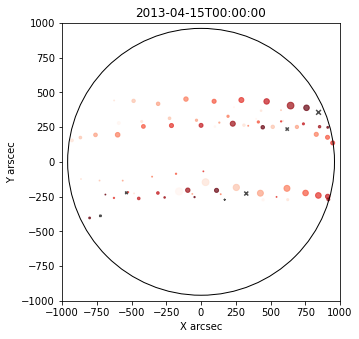

In [14]:
plot_for_date(1200)

The function above `plot_for_date` can be called in a loop and then each png saved to a local directory with an index `i` in filename saved. To make a movie I just use ffmpeg to stitch all the pngs together into an mp4.

## We can also look at active regions as a function of time and compare to sunspot number

In [15]:
# to remind us of the data lets loook at the columns
all_data.keys()

Index(['ar_noaanum', 'event_starttime', 'event_endtime', 'hpc_x', 'hpc_y',
       'hgs_x', 'hgs_y', 'hgc_x', 'hgc_y', 'frm_humanflag', 'frm_name',
       'frm_daterun', 'ar_mtwilsoncls', 'ar_mcintoshcls', 'SOL_standard',
       'ar_numspots', 'area_atdiskcenter', 'area_unit', 'time_datetime',
       'time_since_sec', 'time_since_day'],
      dtype='object')

Lets look at the number of spots for each active region and plot as a function of time. To find how many there are _per day_ we need to find the number of active regions a day and the number of spots a day (i.e. sum over all for each day, like there may be three active regions one day each with 100 spots so need to add these all up). 

Lets create two lists for num of active regions and num of days and use the unique time list to find how many for each day

In [16]:
num_spots = []
num_ar = []
for i in range(len(time_over)):
    data_for_day = all_data[all_data['event_starttime'].isin([time_over[i]])]
    n_spot = data_for_day['ar_numspots'].sum()
    num_spots.append(n_spot)
    num_ar.append(len(data_for_day))

Text(0, 0.5, 'No. sunspots')

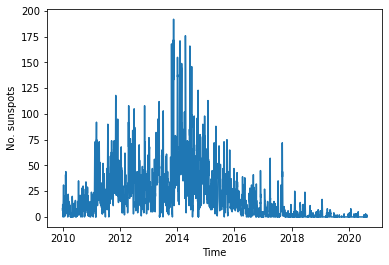

In [19]:
plt.plot(parse_time(time_over).datetime, num_spots)
plt.xlabel("Time")
plt.ylabel("No. sunspots")

Text(0, 0.5, 'No. active regions')

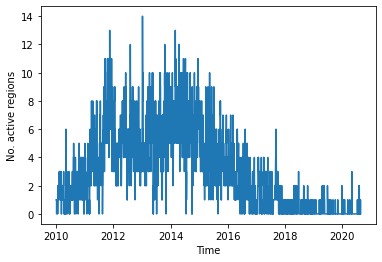

In [21]:
plt.plot(parse_time(time_over).datetime, num_ar)
plt.xlabel("Time")
plt.ylabel("No. active regions")

We may want to resample this so that we can plot the number of sunspots/ar per month rather than day. The easiest way to do this is probably to make a pandas Series from the data

In [36]:
num_sunspots_series = pd.Series(num_spots, index=parse_time(time_over).datetime)
num_ar_series = pd.Series(num_ar, index=parse_time(time_over).datetime)

Text(0, 0.5, 'No. sunspots')

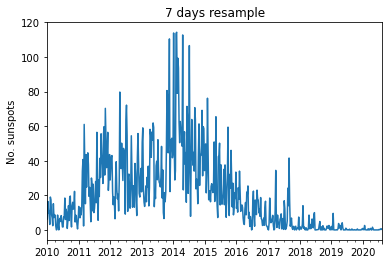

In [32]:
# now as a pandas series we can resample by using the `.resample` method on the Series object, 
# and also quick plot using .plot. Lets plot the resampled data for 7 days resample
num_sunspots_series.resample("7D").mean().plot()
plt.title("7 days resample")
plt.ylabel("No. sunspots")

Text(0, 0.5, 'No. AR')

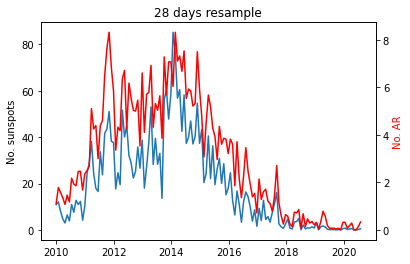

In [42]:
# you can also use plt.plot, here's an example of 28 days resample.
# We can also overplot the number of active regions
fig, ax = plt.subplots()
ax.plot(num_sunspots_series.resample("28D").mean())
ax.set_title("28 days resample")
ax.set_ylabel("No. sunspots")

ax2 = ax.twinx()
ax2.plot(num_ar_series.resample("28D").mean(), color="red")
ax2.set_ylabel("No. AR", color="red")

### Lets compare this sunspot number from NOAA to the SILSO data

In [47]:
def read_ssn():
    ssn = pd.read_csv("../SN_m_tot_V2.0.csv", names=['year', 'month', 'decimal_date', \
                                                  'ssn', 'ssn_dev', 'number_obs', 'indicator'], 
             delimiter=';')
    years = ssn['year'].values; months = ssn['month']
    tt = [datetime.datetime(ssn['year'][i], ssn['month'][i], 1) for i in range(len(ssn))]


    ssn['times'] = tt

    return ssn.set_index('times')

ssn = read_ssn()

Lets plot and compare

Text(0, 0.5, 'No. sunspots')

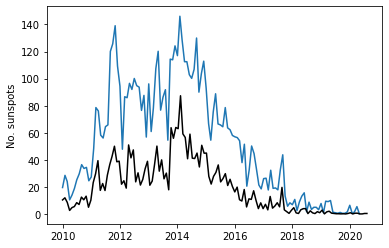

In [51]:
fig, ax = plt.subplots()
ax.plot(ssn['ssn'].truncate('2010-01-01', '2020-08-20'))
ax.plot(num_sunspots_series.resample("30D").mean(), color='k')
ax.set_ylabel("No. sunspots")

This looks different - why? Well SILSO use a different charactization for sunspot numbers such that the reported sunspots are actually equal to:  

* total sunspots = 10 x number of active regions + number of sunspots

Hence lets do this with the NOAA data and compare

In [52]:
ssn_tots = 10*num_ar_series+num_sunspots_series

Text(0, 0.5, 'No. sunspots')

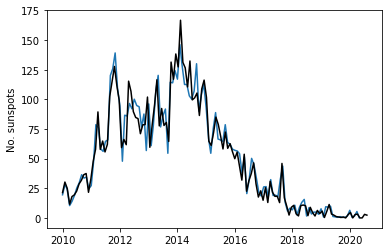

In [54]:
fig, ax = plt.subplots()
ax.plot(ssn['ssn'].truncate('2010-01-01', '2020-08-20'))
ax.plot(ssn_tots.resample("30D").mean(), color='k')
ax.set_ylabel("No. sunspots")

Looks good!!

# Now we can look at the data spanning back further 
The data file `concat_1996-2020.csv` has data for past two solar cycles. Similarly this is made with the `ar_data.py`. We can also prettify some plots

In [61]:
# get all the data and adjust datetime etcs
all_data2 = pd.read_csv('concat_1996-2020.csv')
tt = pd.to_datetime(all_data2['event_starttime'])
times = [(t - tt[0]).total_seconds() for t in tt]
all_data2['time_since_sec'] = times
all_data2['time_datetime'] = tt
all_data2['area_arcsec'] = all_data2['area_atdiskcenter']/(725**2)

Text(0.5, 0, 'Time')

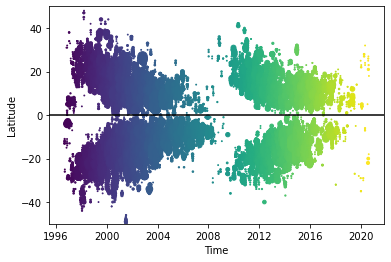

In [68]:
plt.scatter(all_data2["time_datetime"], 
            all_data2["hgc_y"], 
            c=all_data2["time_since_sec"], 
            s=10*all_data2['area_atdiskcenter']/all_data['area_atdiskcenter'].mean(),
            cmap='viridis')
plt.ylim(-50, 50)
plt.axhline(0, color="k")
plt.ylabel("Latitude")
plt.xlabel("Time")

In [70]:
# get all unique days over the solar cycle
tstart = parse_time(all_data2['event_starttime'].min()).datetime
tfinal = parse_time(all_data2['event_endtime'].max()).datetime
time_over = [tstart.strftime('%Y-%m-%dT%H:%M:%S')]
t0 = tstart
while t0 < tfinal:
    t0 = t0 + datetime.timedelta(days=1)
    time_over.append(t0.strftime('%Y-%m-%dT%H:%M:%S'))
all_data_test = all_data2.set_index('time_datetime')

In [75]:
# get number of spots etc as function of day
spots = []
no_ar = []
for i in range(len(time_over)):
    data_for_day = all_data[all_data['event_starttime'].isin([time_over[i]])]
    no_spots = data_for_day['ar_numspots'].sum()
    spots.append(no_spots)
    no_ar.append(len(data_for_day))
spots_ar = pd.Series(spots, index=parse_time(time_over).datetime)
ar_no = pd.Series(no_ar, index=parse_time(time_over).datetime)
ssn_tots = 10*ar_no+spots_ar

## Lets break up each solar cycle

In [76]:
sc23 = all_data_test.truncate('1996-09-01', '2009-01-01')
sc24 = all_data_test.truncate('2009-01-01', '2019-12-01')

sc25 = all_data_test.truncate('2019-12-01', '2020-08-21')

tstart = parse_time("2009-01-01").datetime
tfinal = parse_time("2020-08-21").datetime

Lets plot each SC indivdually with a colormap

Text(0.5, 0, 'Time')

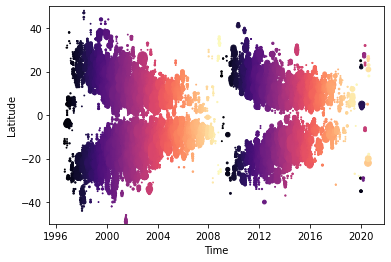

In [84]:
fig, ax = plt.subplots()
ax.scatter(sc23.index, 
            sc23["hgc_y"], 
            c=sc23["time_since_sec"], 
            s=10*sc23['area_atdiskcenter']/sc23['area_atdiskcenter'].mean(),
            cmap='magma')

ax.scatter(sc24.index, 
            sc24["hgc_y"], 
            c=sc24["time_since_sec"], 
            s=10*sc24['area_atdiskcenter']/sc24['area_atdiskcenter'].mean(),
            cmap='magma')

ax.scatter(sc25.index, 
            sc25["hgc_y"], 
            c=sc25["time_since_sec"], 
            s=10*sc25['area_atdiskcenter']/sc25['area_atdiskcenter'].mean(),
            cmap='magma')
ax.set_ylim(-50, 50)
ax.set_ylabel("Latitude")
ax.set_xlabel("Time")

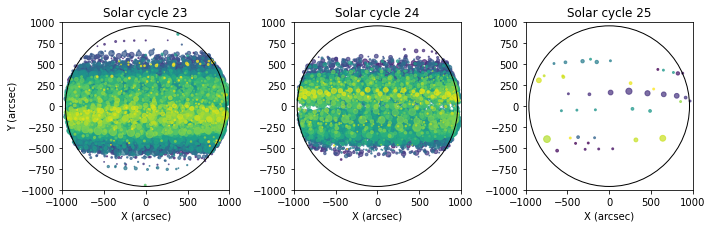

In [102]:

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 6))

# solar cycle 23
ax0.scatter(sc23['hpc_x'], 
                sc23['hpc_y'], 
                s=10*sc23['area_atdiskcenter']/sc23['area_atdiskcenter'].mean(),
                c=sc23["time_since_sec"], 
                alpha=0.7)

ax0.set_title("Solar cycle 23")
ax0.set_ylabel("Y (arcsec)")

# solar cycle 24
ax1.scatter(sc24['hpc_x'], 
            sc24['hpc_y'], 
            s=10*sc24['area_atdiskcenter']/sc23['area_atdiskcenter'].mean(),
            c=sc24["time_since_sec"], 
            alpha=0.7)

ax1.set_title("Solar cycle 24")


# solar cycle 25
ax2.scatter(sc25['hpc_x'], 
            sc25['hpc_y'], 
            s=10*sc25['area_atdiskcenter']/sc25['area_atdiskcenter'].mean(),
            c=sc25["time_since_sec"], 
            alpha=0.7)

ax2.set_title("Solar cycle 25")

for a in (ax0, ax1, ax2):
    a.set_aspect('equal', adjustable='box')
    a.set_xlim(-1000, 1000)
    a.set_ylim(-1000, 1000)
   
    a.set_xlabel("X (arcsec)")
    # overplot a circle of ~radius of sun in arcsec
    circle1 = plt.Circle((0, 0), 960, color='k', fill=False)
    a.add_artist(circle1)

    plt.tight_layout()

## lets make some pretty plots

First going to get some lat and long lines to plot on top.
There are probably some easier ways to do this, but I'm going to make use of sunpy maps to pull these out.

So instead ofjust plotting points on a circle, we are actually going to create a sunpy map and plot the points as coordinates. 


In [103]:
# create an empty sunpy.map.Map
data_arr = np.zeros((1200, 1200))
coord = SkyCoord(0*u.arcsec, 0*u.arcsec, frame=frames.Helioprojective(observer='Earth', obstime=time_over[i]))
header = sunpy.map.make_fitswcs_header(data_arr, coord, scale=[2, 2]*u.arcsec/u.pix)
mapy = sunpy.map.Map(data_arr, header)

In [104]:
num_points = 100
lat_value = [-60, -45, -30, -15, 0, 15, 30, 45, 60]*u.deg
lon_value = [-60, -45, -30, -15, 0, 15, 30, 45, 60]*u.deg
lats = []
lons = []

for l in range(len(lat_value)):
    lat0 = SkyCoord(np.ones(num_points) * lat_value[l],
                np.linspace(-90, 90, num_points) * u.deg,
                frame=frames.HeliographicStonyhurst)
    lon0 = SkyCoord(np.linspace(-80, 80, num_points) * u.deg,
                np.ones(num_points) * lon_value[l], frame=frames.HeliographicStonyhurst)
    lat00 = lat0.transform_to(mapy.coordinate_frame)
    lon00 = lon0.transform_to(mapy.coordinate_frame)
    lats.append(lat00)
    lons.append(lon00)
coords_test = []
lat_value_plot = [-45, -30, -15, 0, 15, 30, 45]
for l in lat_value_plot:
    coords = SkyCoord(90*u.deg, l*u.deg, frame=frames.HeliographicStonyhurst).transform_to(mapy.coordinate_frame)
    coords_test.append(mapy.world_to_pixel(coords))

In [106]:
# this is just a way to crop colormaps, me just being fussy
import matplotlib.colors as mcolors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap
test_cmap = truncate_colormap(plt.get_cmap("Spectral"), minval=0, maxval=0.2)

In [107]:
def plot_24(cmap="Spectral", fname="test"):
    
    test_cmap = truncate_colormap(plt.get_cmap(cmap), minval=0, maxval=0.2)
    fig = plt.figure(figsize=(6, 10))

    # top plot
    ax1 = pylab.axes([0.2, 0.58, 0.60, 0.43], projection=mapy)
    # middle butterfly
    ax2 = pylab.axes([0.1, 0.305, 0.88, 0.33])
    # bottom ssn plot
    ax3 = pylab.axes([0.1, 0.05, 0.88, 0.25], sharex=ax2)

    sizey24 = 10*sc24['area_atdiskcenter']/sc24['area_atdiskcenter'].mean()
    sizey24 = 5*sc24['ar_numspots']

    sizey25 = 10*sc25['area_atdiskcenter']/sc25['area_atdiskcenter'].mean()
    sizey25 = 5*sc25['ar_numspots']

    ##### FIRST SOLAR CYCLE 24 ########
    # circle1 = plt.Circle((0, 0), 960, color='k', fill=False)

    mapy.plot(axes=ax1, alpha=0.0)
    mapy.draw_limb(color='k', lw=0.8)
    #mapy.draw_grid(color='w', lw=0.5)
    ax1.scatter((sc24['hpc_x'].values*u.arcsec).to(u.deg), 
                 (sc24['hpc_y'].values*u.arcsec).to(u.deg), 
                 s=sizey24, edgecolor='k', lw=0.1,
                 c=sc24['times'], alpha=0.5,
                transform=ax1.get_transform('world'), cmap=cmap)

    ax1.scatter((sc25['hpc_x'].values*u.arcsec).to(u.deg), 
                 (sc25['hpc_y'].values*u.arcsec).to(u.deg), 
                 s=sizey25, edgecolor='k', lw=0.1,
                 c=sc25['times'], alpha=0.5,
                transform=ax1.get_transform('world'), cmap=test_cmap)

    ax1.set_xlabel('X (arcsec)')
    ax1.set_ylabel(' ')
    ax1.tick_params(which='both',direction='in')
    ax1.tick_params(axis='y', labelleft=False)
    ax1.set_title('Solar Cycle 24', pad=-1)#.set_position([.5, 1])
    ax1.set_axis_off()
    for l in range(len(lats)):
        ax1.plot_coord(lats[l], color='k', lw=0.2)
        ax1.plot_coord(lons[l], color='k', lw=0.2)

    for c in range(len(coords_test)):
        ax1.text(coords_test[c].x.value+40, coords_test[c].y.value, str(lat_value_plot[c])+'$^\circ$')


    ### ax2
    ax2.scatter(sc24.index, sc24['hgc_y'], 
                alpha=0.5, c=sc24['times'], 
                s=sizey24/2,
                #s=100*all_data['ar_numspots']/all_data['ar_numspots'].mean(),
                cmap=cmap, edgecolor='k', lw=0.1)
    ax2.scatter(sc25.index, sc25['hgc_y'], 
                alpha=0.5, c=sc25['times'], 
                s=sizey25/2,
                #s=100*all_data['ar_numspots']/all_data['ar_numspots'].mean(),
                cmap=test_cmap, edgecolor='k', lw=0.1)

    ax2.set_ylim(-45, 45)
    ax2.set_ylabel('Latitude ($^\circ$)')
    ax2.tick_params(which='both',direction='in', labelbottom=False)
    ax2.xaxis.set_major_locator(dates.YearLocator(4))
    ax2.xaxis.set_minor_locator(dates.YearLocator(1))  
    ax2.xaxis.set_major_formatter(dates.DateFormatter('%Y'))  

    ## ax3

    ##### SUNSPOT NUMBER AS A FUNCTION OF TIME ########
    ax3.plot(ssn_tots.resample('30D').mean().truncate(tstart, tfinal), color='k')
    ax3.set_ylabel('Sunspot number')
    ax3.set_xlabel('Time')
    plt.tight_layout()
    ax3.set_xlim(tstart, tfinal)
    ax3.tick_params(which='both',direction='in')

    ax2.axvline(parse_time("2019-12-01").datetime, ls="dashed", color="grey", lw=0.5)
    ax3.axvline(parse_time("2019-12-01").datetime, ls="dashed", color="grey", lw=0.5)


    plt.savefig("test_{:s}.jpeg".format(fname), dpi=200)
    plt.show()